# BN XP 12762 — CIFAR-100 CNN (Keras / TensorFlow)

This notebook builds, trains, and evaluates a CNN on the **CIFAR-100** dataset using Keras, per the assignment spec:

- **Data:** CIFAR-100 (50k train, 10k test; 32×32 RGB; 100 classes)  
- **Preprocess:** Normalize to [0,1]; one-hot encode labels  
- **Architecture:**
  - Conv2D(32, 3×3, ReLU, padding='same') ×2 → MaxPool(2×2) → Dropout(0.25)
  - Conv2D(64, 3×3, ReLU, padding='same') ×2 → MaxPool(2×2) → Dropout(0.25)
  - Flatten → Dense(512, ReLU) → Dropout(0.5) → Dense(100, Softmax)
- **Optimizer:** Adam  
- **Loss:** categorical_crossentropy  
- **Metrics:** accuracy  
- **Epochs:** 100  
- **Batch size:** 32  

At the end, the notebook **returns** `(model, test_loss, test_accuracy)` to satisfy the rubric.


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Make artifact folders
os.makedirs('models', exist_ok=True)
os.makedirs('plots', exist_ok=True)

print("TensorFlow:", tf.__version__)


TensorFlow: 2.20.0


In [2]:
# Load CIFAR-100 (fine labels, 100 classes)
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
print(f"x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"x_test : {x_test.shape}, y_test : {y_test.shape}")


x_train: (50000, 32, 32, 3), y_train: (50000, 1)
x_test : (10000, 32, 32, 3), y_test : (10000, 1)


In [3]:
# Normalize to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# One-hot labels (100 classes)
num_classes = 100
y_train = to_categorical(y_train, num_classes)
y_test  = to_categorical(y_test, num_classes)

print("After preprocessing:")
print("x_train:", x_train.shape, "y_train:", y_train.shape)
print("x_test :", x_test.shape,  "y_test :", y_test.shape)


After preprocessing:
x_train: (50000, 32, 32, 3) y_train: (50000, 100)
x_test : (10000, 32, 32, 3) y_test : (10000, 100)


In [4]:
def build_cifar100_cnn(input_shape=(32, 32, 3), num_classes=100):
    model = Sequential([
        # Block 1
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        # Block 2
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        # Head
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

model = build_cifar100_cnn()
model.summary()


c:\Users\Nishant\OneDrive\Desktop\nait mi\cifar100-cnn-project-\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,214,532 (8.45 MB)

 Trainable params: 2,214,532 (8.45 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
EPOCHS = 100
BATCH_SIZE = 32

history = model.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_test, y_test),
    shuffle=True,
    verbose=1
)


Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 40ms/step - accuracy: 0.0908 - loss: 3.9492 - val_accuracy: 0.1902 - val_loss: 3.3955
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.1940 - loss: 3.3230 - val_accuracy: 0.2600 - val_loss: 3.0061
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.2553 - loss: 3.0053 - val_accuracy: 0.3157 - val_loss: 2.7469
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.3002 - loss: 2.7903 - val_accuracy: 0.3530 - val_loss: 2.5783
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.3280 - loss: 2.6401 - val_accuracy: 0.3708 - val_loss: 2.4962
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.3519 - loss: 2.5190 - val_accuracy: 0.3876 - val_loss: 2.4093
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.3734 - loss: 2.4144 - val_accuracy: 0.3966 - val_loss: 2.3768
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 

In [6]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest results -> Loss: {test_loss:.4f} | Accuracy: {test_accuracy:.4f}")



Test results -> Loss: 2.6683 | Accuracy: 0.4400


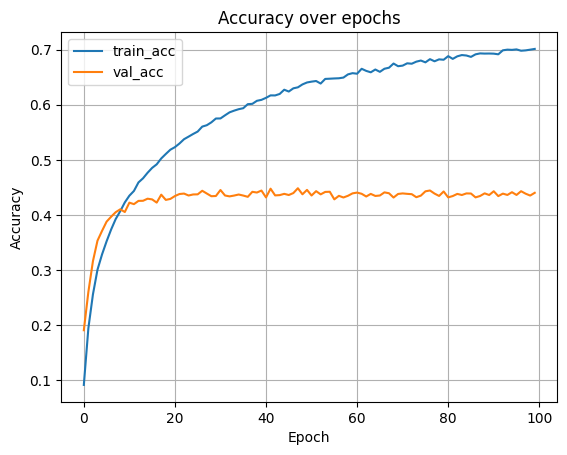

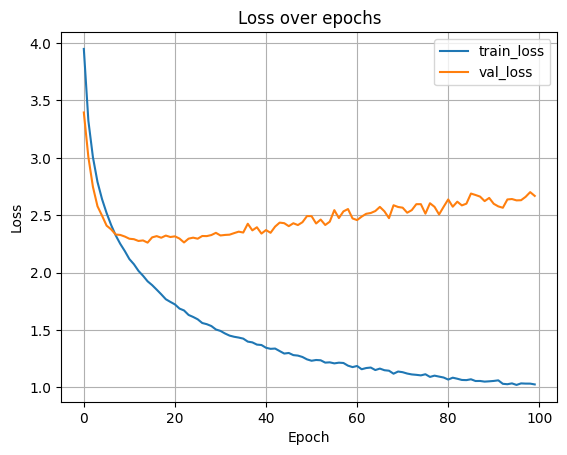

In [7]:
# Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('plots/accuracy.png', dpi=300)
plt.show()

# Loss
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('plots/loss.png', dpi=300)
plt.show()


In [8]:
# Save the trained model
model.save('models/cifar100_cnn_model.h5')
print("Saved model to 'models/cifar100_cnn_model.h5'")

# ---- IMPORTANT FOR FULL XP ----
# Return the model and test results (loss, accuracy)
(model, test_loss, test_accuracy)


Saved model to 'models/cifar100_cnn_model.h5'


(<Sequential name=sequential, built=True>,
 2.668308734893799,
 0.4399999976158142)